First few rows of the merged dataset:
      Quarter  quarterly revenue  quarterly gross profit  \
0  2020-03-31       1.185000e+09             689000000.0   
1  2020-06-30       4.850000e+08             264000000.0   
2  2020-09-30       6.980000e+08             424000000.0   
3  2020-12-31       8.200000e+08             524000000.0   
4  2021-03-31       1.122000e+09             679000000.0   

   quarterly net income                                              Title  \
0            83000000.0  winter clothing tryon haul (Urban Outfitters, ...   
1          -244000000.0  📖 Genialne Fantasy! -  Joe Abercrombie Trylogi...   
2             5000000.0  BEST PETITE DENIM JEANS TRY-ON & REVIEW / Levi...   
3            42000000.0  A&F 90's Straight Ultra High Rise Jean Review ...   
4            82000000.0  Abercrombie and Fitch + Hollister TRY-ON HAUL ...   

        Views     Likes  Comments  \
0    178520.0    4416.0     724.0   
1  15366278.0  149656.0   40572.0   
2    338531.0   10457

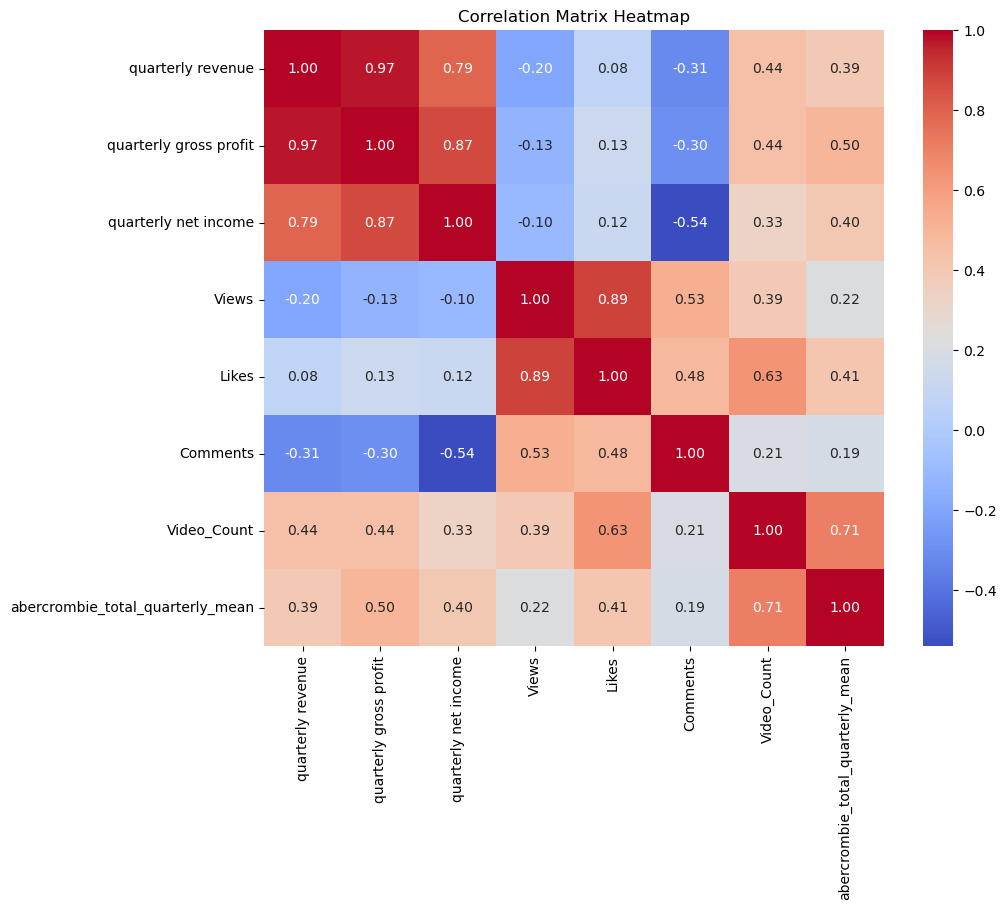

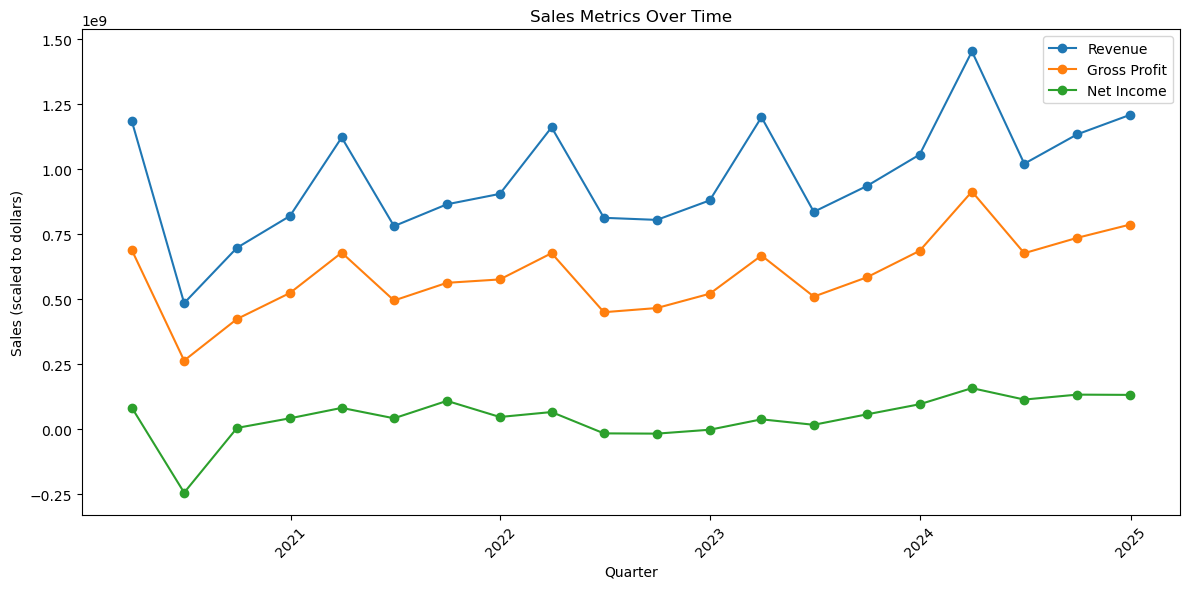

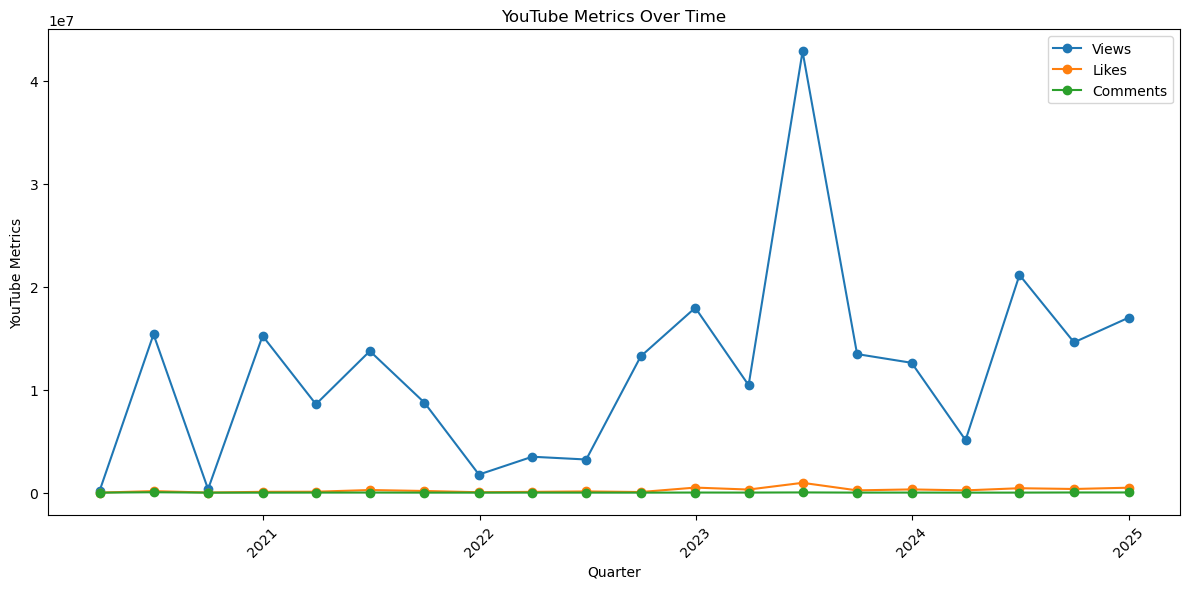

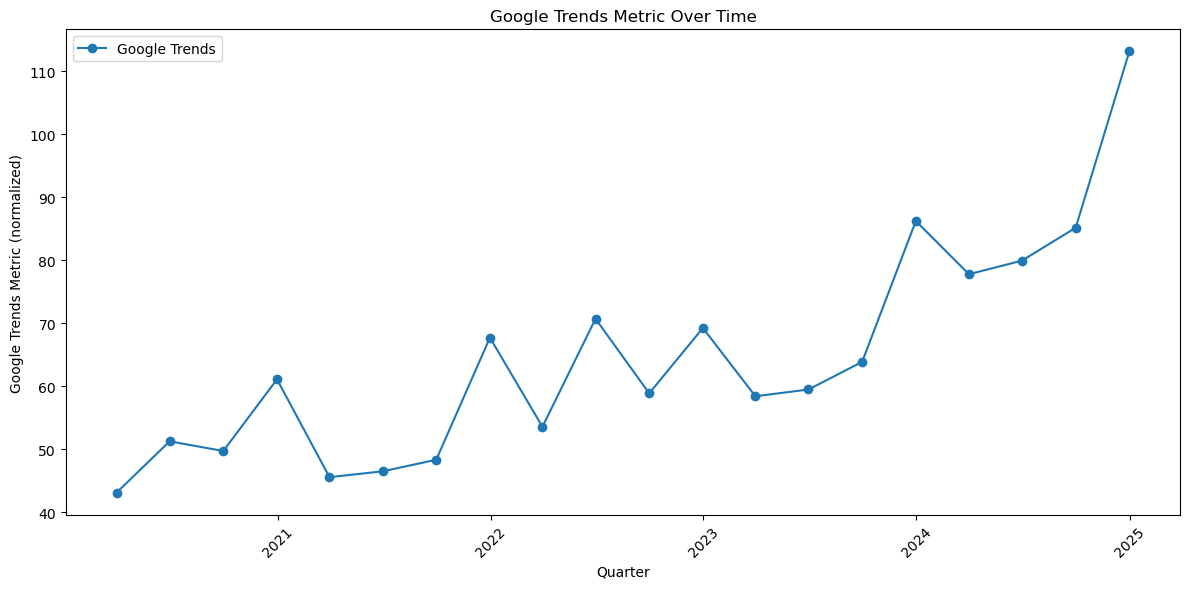

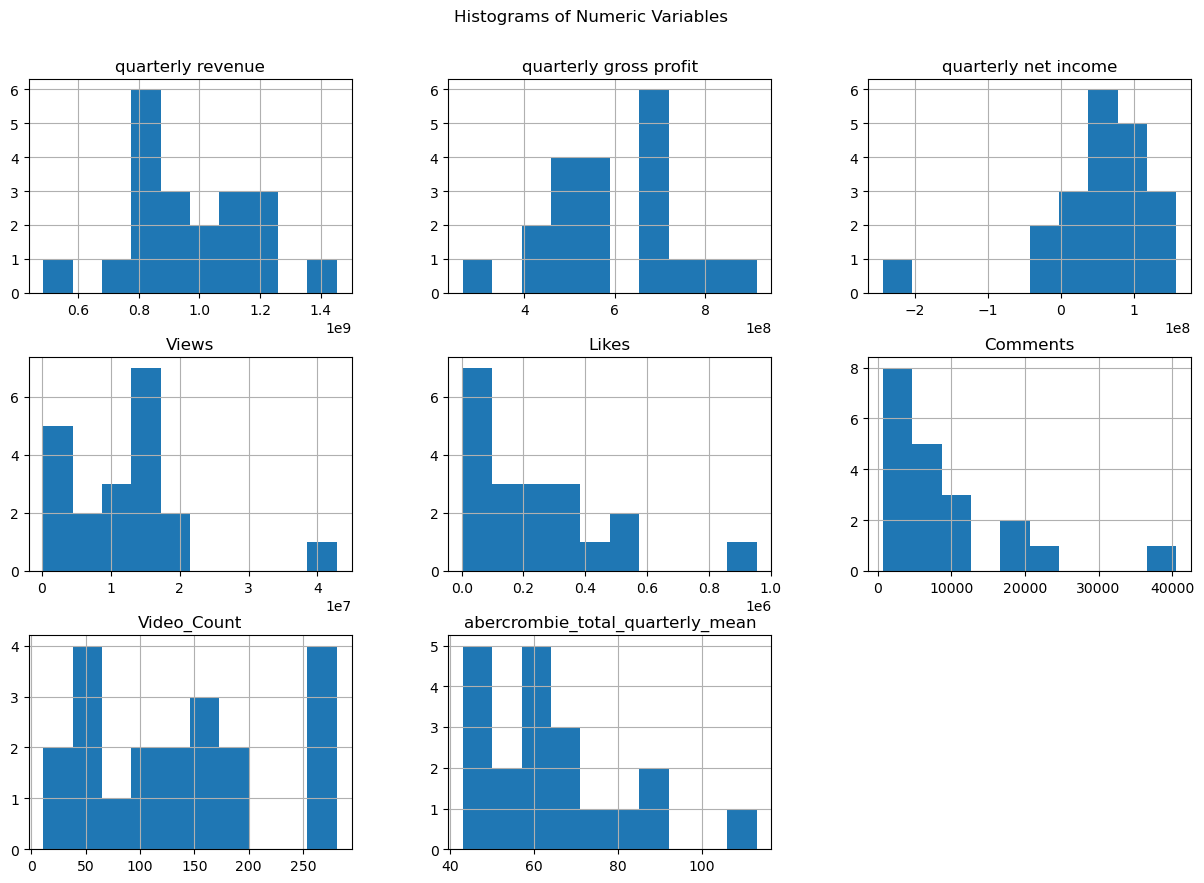

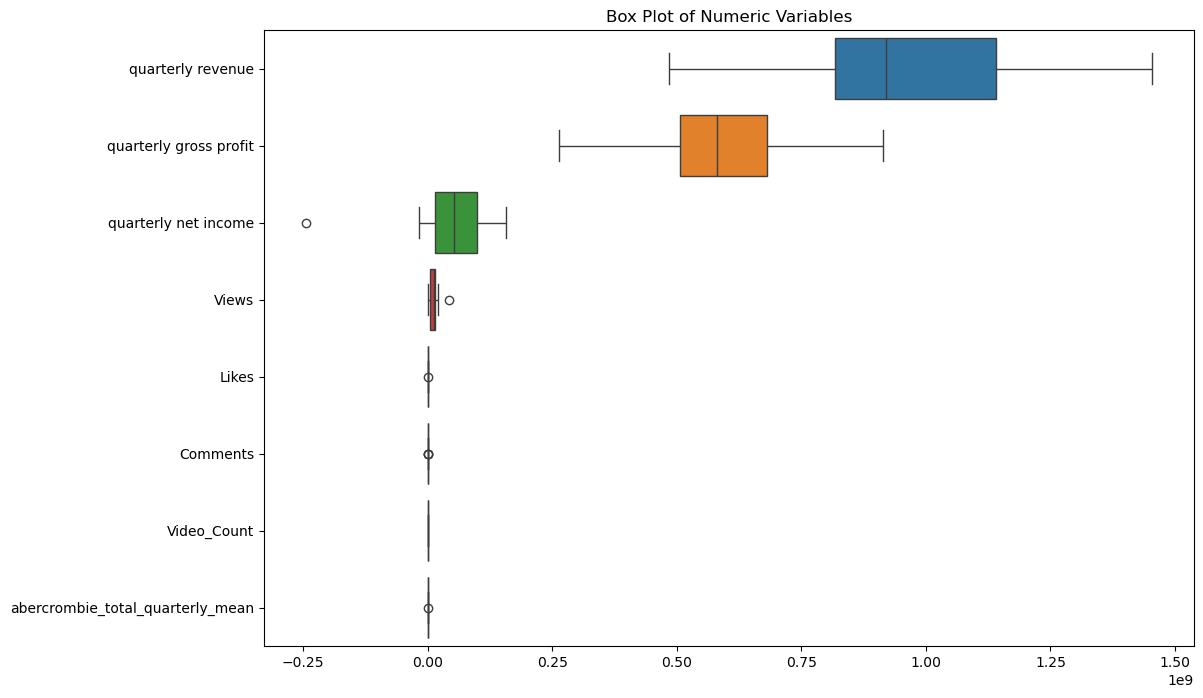

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_final_clean = pd.read_csv(r"C:\Users\Admin\final_capstone_project\data\processed\merged_quarterly_data.csv")

# -------------------------------
# Step 1: Basic Data Inspection
# -------------------------------

# Display the first few rows of the merged dataset
print("First few rows of the merged dataset:")
print(df_final_clean.head())

# Show data types and non-null counts
print("\nDataFrame Info:")
print(df_final_clean.info())

# Summary statistics of numeric variables
print("\nSummary Statistics:")
print(df_final_clean.describe())

# -------------------------------
# Step 2: Correlation Analysis
# -------------------------------

# Select only numeric columns
numeric_df = df_final_clean.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# -------------------------------
# Step 3: Time Series Analysis
# -------------------------------

# Ensure the "Quarter" column is datetime and sort by it
df_final_clean["Quarter"] = pd.to_datetime(df_final_clean["Quarter"], errors='coerce')
df_final_clean.sort_values("Quarter", inplace=True)

# Plot Sales Metrics Over Time
plt.figure(figsize=(12,6))
plt.plot(df_final_clean["Quarter"], df_final_clean["quarterly revenue"], marker="o", label="Revenue")
plt.plot(df_final_clean["Quarter"], df_final_clean["quarterly gross profit"], marker="o", label="Gross Profit")
plt.plot(df_final_clean["Quarter"], df_final_clean["quarterly net income"], marker="o", label="Net Income")
plt.xlabel("Quarter")
plt.ylabel("Sales (scaled to dollars)")
plt.title("Sales Metrics Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot YouTube Metrics Over Time (e.g., Views, Likes, Comments)
plt.figure(figsize=(12,6))
plt.plot(df_final_clean["Quarter"], df_final_clean["Views"], marker="o", label="Views")
plt.plot(df_final_clean["Quarter"], df_final_clean["Likes"], marker="o", label="Likes")
plt.plot(df_final_clean["Quarter"], df_final_clean["Comments"], marker="o", label="Comments")
plt.xlabel("Quarter")
plt.ylabel("YouTube Metrics")
plt.title("YouTube Metrics Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Google Trends Metric Over Time
plt.figure(figsize=(12,6))
plt.plot(df_final_clean["Quarter"], df_final_clean["abercrombie_total_quarterly_mean"], marker="o", label="Google Trends")
plt.xlabel("Quarter")
plt.ylabel("Google Trends Metric (normalized)")
plt.title("Google Trends Metric Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------
# Step 4: Distribution Analysis
# -------------------------------

# Plot histograms of numeric variables
numeric_df.hist(figsize=(15,10))
plt.suptitle("Histograms of Numeric Variables", y=0.95)
plt.show()

# Plot box plots for numeric variables
plt.figure(figsize=(12,8))
sns.boxplot(data=numeric_df, orient="h")
plt.title("Box Plot of Numeric Variables")
plt.show()


Correlation Matrix (including lagged variables):
                                  quarterly revenue  quarterly_revenue_lag1  \
quarterly revenue                          1.000000                0.114507   
quarterly_revenue_lag1                     0.114507                1.000000   
Views                                     -0.198820                0.469644   
Views_lag1                                 0.282295               -0.239965   
abercrombie_total_quarterly_mean           0.394573                0.390041   
trends_lag1                                0.811203                0.312457   

                                     Views  Views_lag1  \
quarterly revenue                -0.198820    0.282295   
quarterly_revenue_lag1            0.469644   -0.239965   
Views                             1.000000    0.008126   
Views_lag1                        0.008126    1.000000   
abercrombie_total_quarterly_mean  0.219779    0.142953   
trends_lag1                       0.096336    0.1

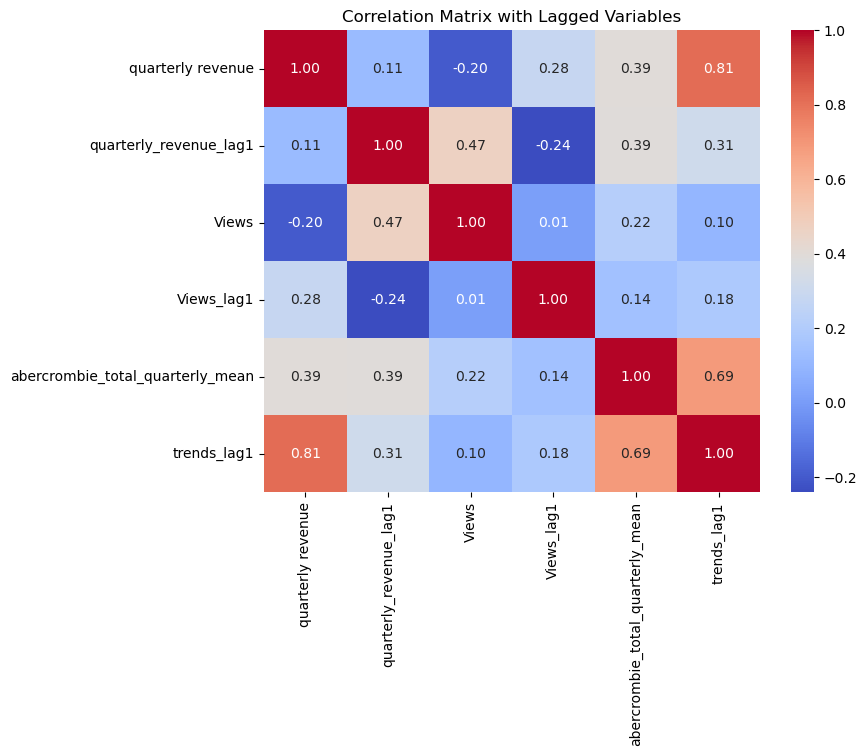

In [4]:
# =============================================================================
# Step 1: Lag Analysis
# =============================================================================
# In this section, I create lagged variables to see if last quarter’s social media
# metrics (YouTube Views and Google Trends) are related to this quarter’s sales.
# I then compute and plot the correlation matrix for both current and lagged values.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the DataFrame is sorted by the time variable ("Quarter") before creating lags.
df_final_clean.sort_values("Quarter", inplace=True)

# Create lagged versions (lag of one quarter) for key metrics.
# The .shift(1) method moves the data down by one row, so each row gets the value from the previous quarter.
df_final_clean["quarterly_revenue_lag1"] = df_final_clean["quarterly revenue"].shift(1)
df_final_clean["Views_lag1"] = df_final_clean["Views"].shift(1)
df_final_clean["trends_lag1"] = df_final_clean["abercrombie_total_quarterly_mean"].shift(1)

# Define a list of columns to analyze (both current values and their lagged counterparts).
lag_cols = [
    "quarterly revenue", "quarterly_revenue_lag1",
    "Views", "Views_lag1",
    "abercrombie_total_quarterly_mean", "trends_lag1"
]

# Compute the correlation matrix for these variables.
lag_corr = df_final_clean[lag_cols].corr()
print("Correlation Matrix (including lagged variables):")
print(lag_corr)

# Plot the correlation matrix as a heatmap for easy visualization.
plt.figure(figsize=(8, 6))
sns.heatmap(lag_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix with Lagged Variables")
plt.show()


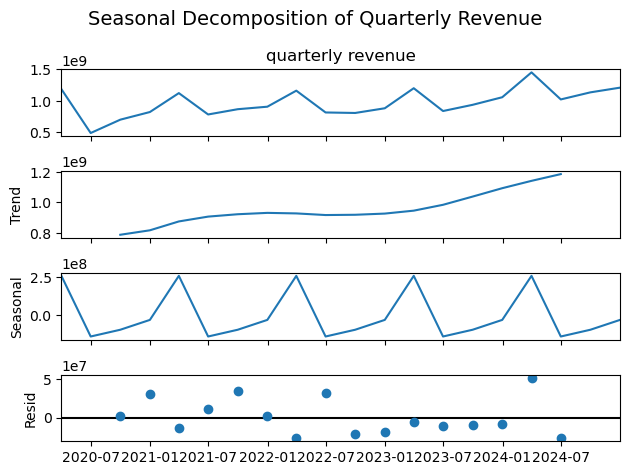

In [5]:
# =============================================================================
# Step 2: Seasonal Decomposition of Sales
# =============================================================================
# In this step, I decompose the quarterly revenue time series into its trend,
# seasonal, and residual components. This helps me understand the underlying
# patterns and seasonal effects in the sales data.

from statsmodels.tsa.seasonal import seasonal_decompose

# For time series analysis, I set the "Quarter" column as the index and sort the data.
df_sales_ts = df_final_clean.set_index("Quarter").sort_index()

# Decompose the 'quarterly revenue' time series.
# Since the data is quarterly, I set period=4 (assuming 4 quarters per year).
decomposition = seasonal_decompose(df_sales_ts["quarterly revenue"], model='additive', period=4)

# Plot the decomposition results (trend, seasonality, and residuals).
decomposition.plot()
plt.suptitle("Seasonal Decomposition of Quarterly Revenue", fontsize=14)
plt.tight_layout()
plt.show()


In [6]:
# =============================================================================
# Step 3: Regression Analysis
# =============================================================================
# Here, I build a simple Ordinary Least Squares (OLS) regression model to
# quantify the relationship between social media metrics (YouTube Views and Google Trends)
# and quarterly revenue. I use the statsmodels package for this analysis.

import statsmodels.api as sm

# Select the predictor variables (independent variables) and the target variable (dependent variable).
X = df_final_clean[["Views", "abercrombie_total_quarterly_mean"]]
y = df_final_clean["quarterly revenue"]

# Add a constant to the predictors to account for the intercept in the regression model.
X = sm.add_constant(X)

# Fit the OLS regression model; missing='drop' ensures that rows with NaN values are excluded.
model = sm.OLS(y, X, missing='drop').fit()

# Print out the regression summary to review coefficients, p-values, R-squared, etc.
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      quarterly revenue   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     2.704
Date:                Sat, 08 Feb 2025   Prob (F-statistic):             0.0956
Time:                        09:50:32   Log-Likelihood:                -409.59
No. Observations:                  20   AIC:                             825.2
Df Residuals:                      17   BIC:                             828.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

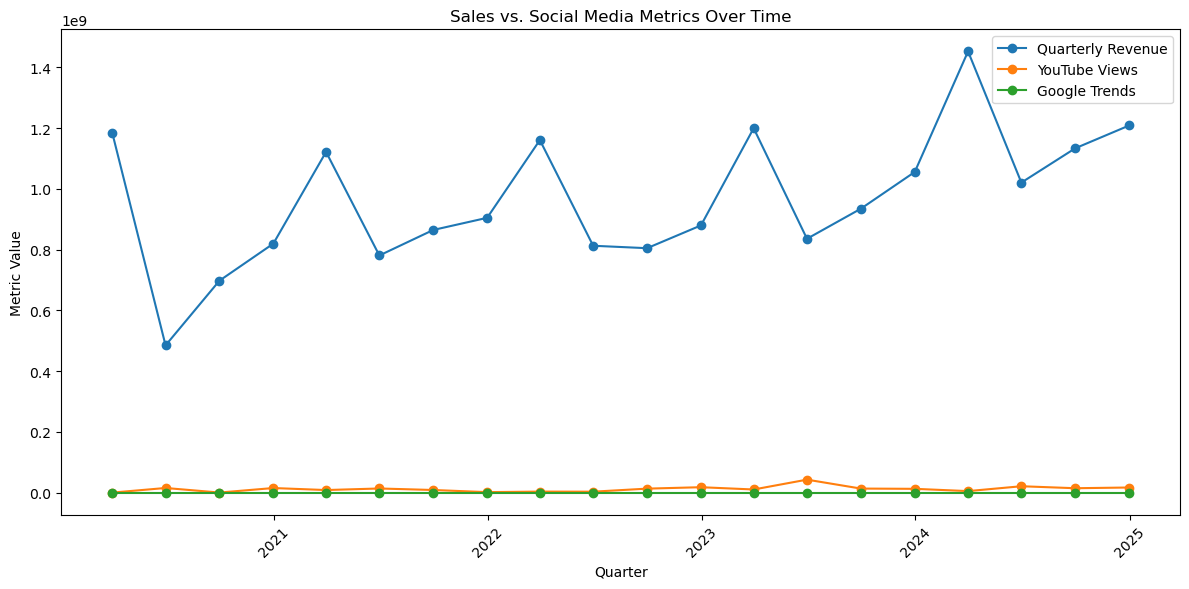

In [7]:
# =============================================================================
# Step 4: Visualization of Combined Trends Over Time
# =============================================================================
# In this final EDA step, I create a time series plot that overlays quarterly revenue,
# YouTube Views, and the Google Trends metric. This visual helps to see how the variables
# move over time and whether their peaks and troughs coincide.

plt.figure(figsize=(12, 6))

# Plot quarterly revenue (sales) over time.
plt.plot(df_final_clean["Quarter"], df_final_clean["quarterly revenue"], marker="o", label="Quarterly Revenue")

# Plot YouTube Views over time.
plt.plot(df_final_clean["Quarter"], df_final_clean["Views"], marker="o", label="YouTube Views")

# Plot Google Trends metric over time.
plt.plot(df_final_clean["Quarter"], df_final_clean["abercrombie_total_quarterly_mean"], marker="o", label="Google Trends")

# Add labels, title, and legend.
plt.xlabel("Quarter")
plt.ylabel("Metric Value")
plt.title("Sales vs. Social Media Metrics Over Time")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability.
plt.legend()
plt.tight_layout()
plt.show()
